In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# get csv data and ccreate DataFrame
data = pd.read_csv(
    '.\Recycling_und_Mülltrennung_in_Deutschland.csv'
)

df = pd.DataFrame(data)


In [3]:
# group by values
def group_data(data):
    grouped_data = {}
    amount = len(data)
    for element in data:
        if element in grouped_data:
            grouped_data[element] += 1
        else:
            grouped_data[element] = 1
    
    for key in grouped_data:
        percent = (grouped_data[key] / amount) * 100
        grouped_data[key] = round(percent, 2)
    return grouped_data

In [4]:
# plot bar chart with dictionary
def plot_data(data_dictionary):

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(data_dictionary.keys(), data_dictionary.values())
    plt.show()

In [5]:
def evaluate_data(data_frame):
    for label, content in data_frame.items():
        grouped_data = group_data(content)
        #for key in grouped_data:
            #print('{}: {}'.format(key, grouped_data[key]))
        plot_data(grouped_data)

<h2> General Data </h2>

In [6]:
# remove columns that are not needed
df_filtered = df.drop(columns= ["Teilnehmer", "Startzeit", "Endzeit", "Quelle"])

#evaluate_data(df_filtered, '00_all')

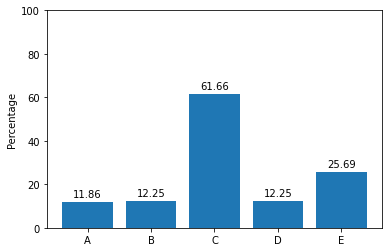

In [7]:
question_data = []

for label in df_filtered.keys()[6:11]:
    content = df_filtered[label]
    grouped_data = group_data(content)
    question_data.append(grouped_data[1])


fig, ax = plt.subplots()
rects1 = ax.bar(['A', 'B', 'C', 'D', 'E'], question_data)

ax.bar_label(rects1, padding=3)
ax.set_ylim(top=100)
ax.set_ylabel('Percentage')
plt.savefig('questions.jpg')
plt.show()


<h2> Filter </h2>

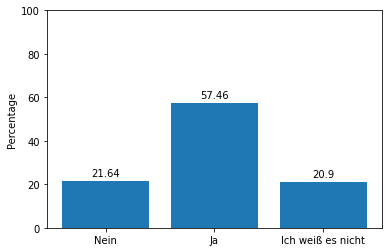

In [8]:
# people who live in Berlin: do they know what a recyclables garbage can is or not?
df_wst_unknown = df_filtered.loc[(df_filtered['In welchem Bundesland wohnen Sie?'] == 'Berlin')]
label = 'Bei uns wird eine Wertstofftonne verwendet.'
data_wst_unknown = group_data(df_wst_unknown[label])

fig, ax = plt.subplots()
rects1 = ax.bar(data_wst_unknown.keys(), data_wst_unknown.values())

ax.bar_label(rects1, padding=3)
ax.set_ylim(top=100)
ax.set_ylabel('Percentage')
plt.savefig('questions.jpg')
plt.show()

<h4> Differences between ages </h4>

In [76]:
df_20 = df_filtered.loc[(df_filtered['Zu welcher Altersgruppe gehören Sie?'] == '20-29')]
df_30 = df_filtered.loc[(df_filtered['Zu welcher Altersgruppe gehören Sie?'] == '30-39')]
df_40 = df_filtered.loc[(df_filtered['Zu welcher Altersgruppe gehören Sie?'] == '40-49')]
df_50 = df_filtered.loc[(df_filtered['Zu welcher Altersgruppe gehören Sie?'] == '50-59')]

In [180]:
def plotDataAge(label, save_file_name):
    data_20y = group_data(df_20[label])
    data_30y = group_data(df_30[label])
    data_40y = group_data(df_40[label])
    data_50y = group_data(df_50[label])

    labels = ['20-29', '30-39', '40-49', '50-59']
    
    if(0 not in data_20y.keys()):
        data_20y[0] = 0
    if(0 not in data_30y.keys()):
        data_30y[0] = 0
    if(0 not in data_40y.keys()):
        data_40y[0] = 0
    if(0 not in data_50y.keys()):
        data_50y[0] = 0
    if(1 not in data_20y.keys()):
        data_20y[1] = 0
    if(1 not in data_30y.keys()):
        data_30y[1] = 0
    if(1 not in data_40y.keys()):
        data_40y[1] = 0
    if(1 not in data_50y.keys()):
        data_50y[1] = 0
        
    no_values = [data_20y[0], data_30y[0], data_40y[0], data_50y[0]]
    yes_values = [data_20y[1], data_30y[1], data_40y[1], data_50y[1]]

    plot_yesno_compare_data('', labels, yes_values, no_values, save_file_name)

In [6]:
def plot_yesno_compare_data(title, labels, yes_values, no_values, file_name):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, yes_values, width, label='Yes')
    rects2 = ax.bar(x + width/2, no_values, width, label='No')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_ybound(lower=0, upper=100)
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    
    fig.savefig(file_name+'.jpg')
    plt.show()

In [189]:
def plotLikertScale(label):
    data_20y = group_data(df_20[label])
    data_30y = group_data(df_30[label])
    data_40y = group_data(df_40[label])
    data_50y = group_data(df_50[label])

    labels = ['20-29', '30-39', '40-49', '50-59']
    
    strongly_disagree = 'trifft nicht zu'
    disagree = 'trifft eher nicht zu'
    agree = 'trifft eher zu'
    strongly_agree = 'trifft zu'
    
    if(strongly_disagree not in data_20y.keys()):
        data_20y[strongly_disagree] = 0
    if(strongly_disagree not in data_40y.keys()):
        data_40y[strongly_disagree] = 0
    if(strongly_disagree not in data_50y.keys()):
        data_50y[strongly_disagree] = 0
    if(disagree not in data_40y.keys()):
        data_40y[disagree] = 0
    
    strongly_disagree_values = [data_20y[strongly_disagree], data_30y[strongly_disagree], data_40y[strongly_disagree], data_50y[strongly_disagree]]
    disagree_values = [data_20y[disagree], data_30y[disagree], data_40y[disagree], data_50y[disagree]]
    agree_values = [data_20y[agree], data_30y[agree], data_40y[agree], data_50y[agree]]
    strongly_agree_values = [data_20y[strongly_agree], data_30y[strongly_agree], data_40y[strongly_agree], data_50y[strongly_agree]]

    plot_likert_compare_data('', labels, strongly_disagree_values, disagree_values, agree_values, strongly_agree_values, label)
    

In [190]:
def plot_likert_compare_data(title, labels, v1, v2, v3, v4, file_name):
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, v1, width, label='trifft nicht zu')
    rects2 = ax.bar(x - width/2, v2, width, label='trifft eher nicht zu')
    rects3 = ax.bar(x + width/2, v3, width, label='trifft eher zu')
    rects4 = ax.bar(x + 3*width/2, v4, width, label='trifft zu')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_ybound(lower=0, upper=100)
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
    ax.bar_label(rects4, padding=3)

    fig.tight_layout()
    
    fig.savefig(file_name.replace("/", "-") + '.jpg')
    plt.show()

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich habe nicht viel Zeit im Alltag, um mich mit Mülltrennung und Recycling auseinander zu setzen.)


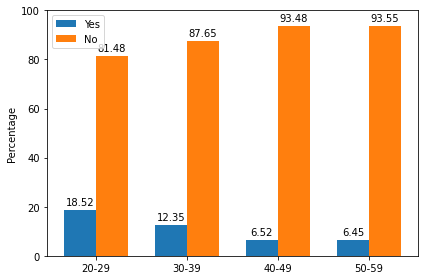

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Mir fehlt die Motivation, mich intensiver mit dem Thema auseinander zu setzen.)


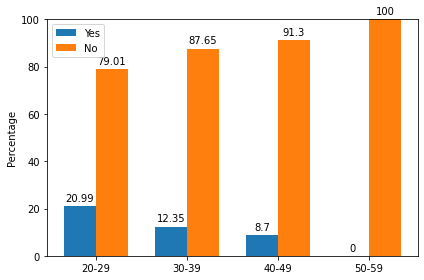

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich bin der Meinung, dass ich mich mit dem Thema gut genug auskenne und keine Unterstützung bei der Mülltrennung brauche.)


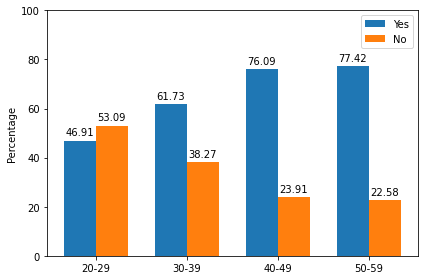

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich möchte mehr über das Thema erfahren, weiß aber nicht, wie oder wo ich mich informieren kann.)


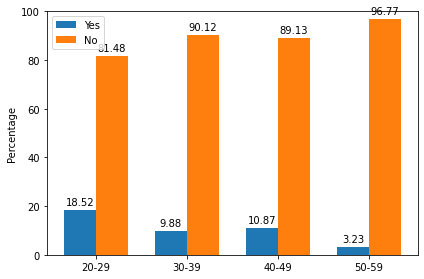

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Die vorhandenen Informationen sind nicht sehr übersichtlich und es ist oft schwer, eine Antwort auf meine Frage zu finden.)


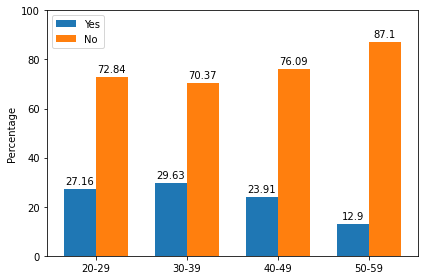

In [187]:
for label in df_filtered.keys()[6:11]:
    print(label)
    plotDataAge(label, label)

Wählen Sie die Aussagen, die Sie für richtig halten. (Wenn zu viele Gegenstände in der falschen Mülltonne landen, kann es sein, dass der Müll nicht abgeholt wird.)


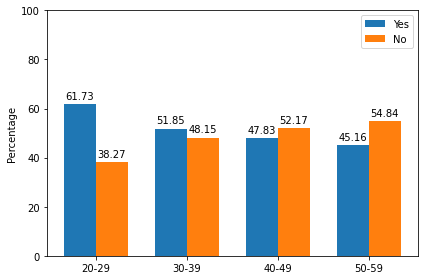

Wählen Sie die Aussagen, die Sie für richtig halten. (Ca. 30% des Mülls besteht auf Fehlwürfen (Müll wird in der falschen Tonne entsorgt).)


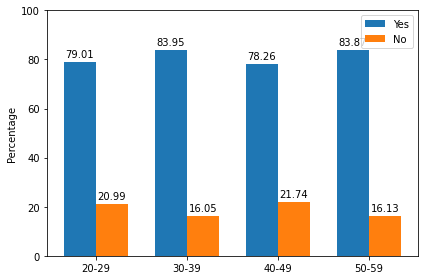

Wählen Sie die Aussagen, die Sie für richtig halten. (Menschen sortieren den Müll besser und präziser als Maschinen.)


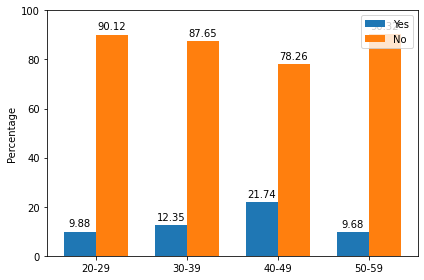

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird eine Tonne CO2 gespart.)


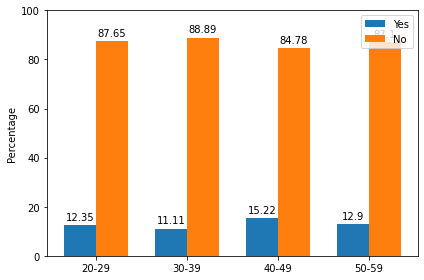

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird 100 Kilogramm CO2 gespart.)


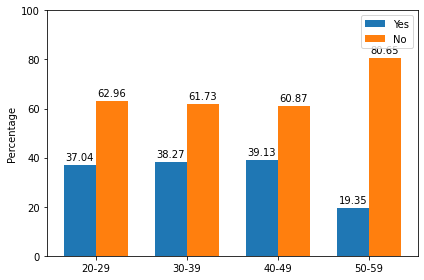

Wählen Sie die Aussagen, die Sie für richtig halten. (Der grüne Punkt hat keine Bedeutung mehr für die Mülltrennung.)


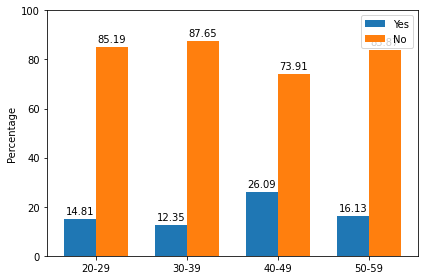

Wählen Sie die Aussagen, die Sie für richtig halten. (Blaues und rotes Glas gehört in den Braunglascontainer.)


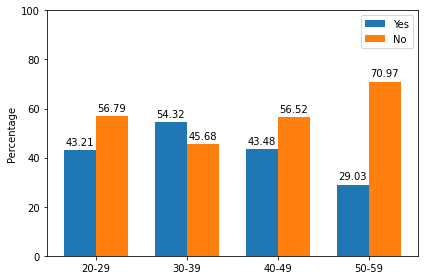

Wählen Sie die Aussagen, die Sie für richtig halten. (Kunststoff-Verpackungen sollte man ineinanderstapeln, um Platz zu sparen.)


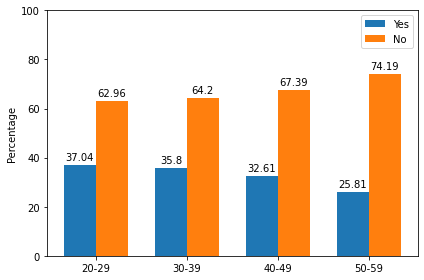

In [188]:
# correctness of answers
for label in df_filtered.keys()[12:20]:
    print(label)
    plotDataAge(label, label)


Ich halte Mülltrennung für ein wichtiges Thema. (Eigene Kriterien) 


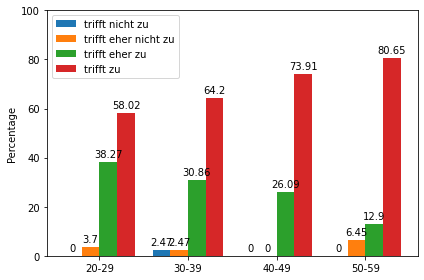

Ich fühle mich schlecht, wenn ich etwas in den Müll werfe ohne mir komplett sicher zu sein, dass es dort richtig ist. (Eigene Kriterien) 


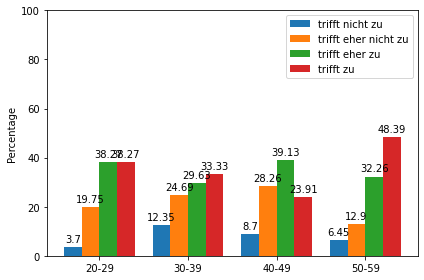

Ich fühle mich gut, wenn ich Müll trenne, da ich etwas zu Umwelt und Nachhaltigkeit beitrage. (Eigene Kriterien) 


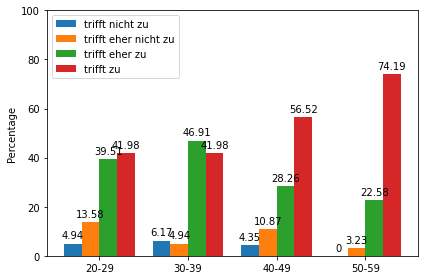

Ich fühle mich ausreichend informiert darüber, was in welcher Tonne entsorgt wird (Eigene Kriterien) 


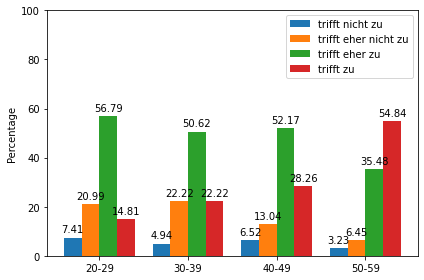

Ich bin oft unsicher, in welchen Müll bestimmte Gegenstände gehören. (Eigene Kriterien) 


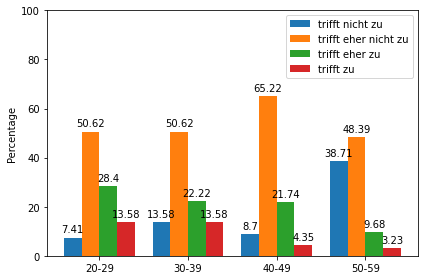

Ich habe genug Ressourcen, um mich über Mülltrennung/Recycling zu informieren, falls etwas unklar ist (Eigene Kriterien) 


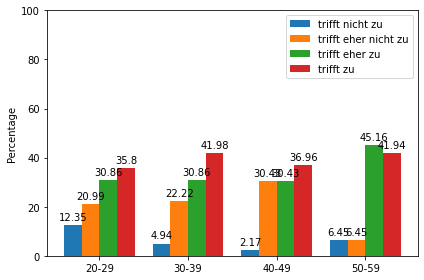

In [193]:
for label in df_filtered.keys()[21:27]:
    print(label)
    plotLikertScale(label)


Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Entsorge ich es einfach im Restmüll)


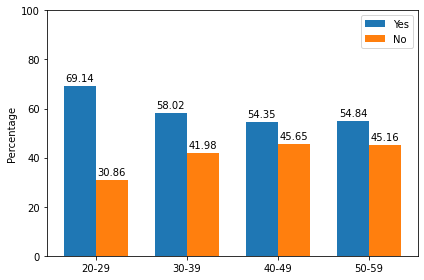

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Frage ich jemanden in meinem Umfeld)


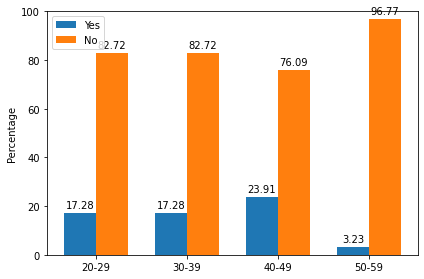

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Recherchiere ich online)


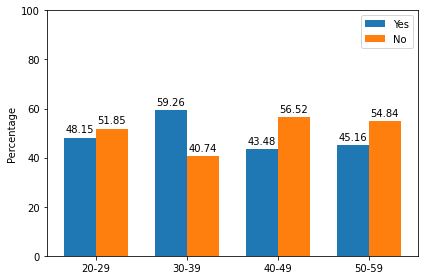

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Sonstiges)


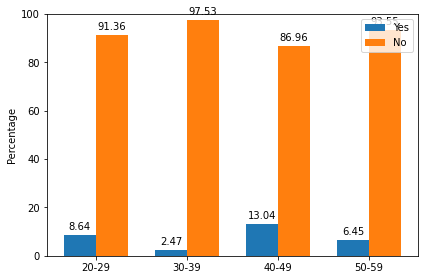

In [194]:
for label in df_filtered.keys()[27:31]:
    print(label)
    plotDataAge(label, label)

<h4> Differences in confidence </h4>

In [215]:
df_not_confident = df_filtered.loc[(df_filtered['Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich bin der Meinung, dass ich mich mit dem Thema gut genug auskenne und keine Unterstützung bei der Mülltrennung brauche.)'] == 0)]
df_confident = df_filtered.loc[(df_filtered['Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich bin der Meinung, dass ich mich mit dem Thema gut genug auskenne und keine Unterstützung bei der Mülltrennung brauche.)'] == 1)]


In [224]:
def plotDataConfidence(label, save_file_name, x_scale_labels):
    data_not_confident = group_data(df_not_confident[label])
    data_confident = group_data(df_confident[label])
    
    if(0 not in data_not_confident.keys()):
        data_not_confident[0] = 0
    if(0 not in data_confident.keys()):
        data_confident[0] = 0
    if(1 not in data_not_confident.keys()):
        data_not_confident[1] = 0
    if(1 not in data_confident.keys()):
        data_confident[1] = 0
        
    no_values = [data_not_confident[0], data_confident[0]]
    yes_values = [data_not_confident[1], data_confident[1]]

    plot_yesno_compare_data('', x_scale_labels, yes_values, no_values, save_file_name)

In [221]:
def plot_likert_scale_confidence(title):
    data_not_confident = group_data(df_not_confident[label])
    data_confident = group_data(df_confident[label])

    labels = ['not confident', 'confident']
    
    strongly_disagree = 'trifft nicht zu'
    disagree = 'trifft eher nicht zu'
    agree = 'trifft eher zu'
    strongly_agree = 'trifft zu'
    
    if(strongly_disagree not in data_not_confident.keys()):
        data_not_confident[strongly_disagree] = 0
    if(strongly_disagree not in data_confident.keys()):
        data_confident[strongly_disagree] = 0
    if(disagree not in data_not_confident.keys()):
        data_not_confident[disagree] = 0
    if(disagree not in data_confident.keys()):
        data_confident[disagree] = 0
    if(agree not in data_not_confident.keys()):
        data_not_confident[agree] = 0
    if(agree not in data_confident.keys()):
        data_confident[agree] = 0
    if(strongly_agree not in data_not_confident.keys()):
        data_not_confident[strongly_agree] = 0
    if(strongly_agree not in data_confident.keys()):
        data_confident[strongly_agree] = 0
    
    strongly_disagree_values = [data_not_confident[strongly_disagree], data_confident[strongly_disagree]]
    disagree_values = [data_not_confident[disagree], data_confident[disagree]]
    agree_values = [data_not_confident[agree], data_confident[agree]]
    strongly_agree_values = [data_not_confident[strongly_agree], data_confident[strongly_agree]]

    plot_likert_compare_data('', labels, strongly_disagree_values, disagree_values, agree_values, strongly_agree_values, label)
    

In [225]:
x_scale_labels_condfidence = ['confident', 'not confident']

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich habe nicht viel Zeit im Alltag, um mich mit Mülltrennung und Recycling auseinander zu setzen.)


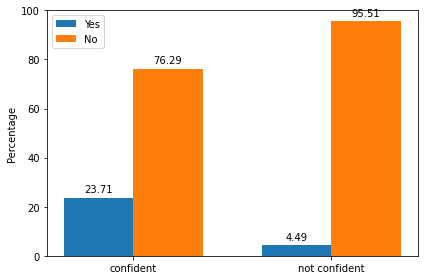

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Mir fehlt die Motivation, mich intensiver mit dem Thema auseinander zu setzen.)


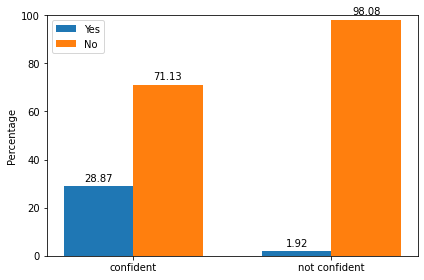

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich bin der Meinung, dass ich mich mit dem Thema gut genug auskenne und keine Unterstützung bei der Mülltrennung brauche.)


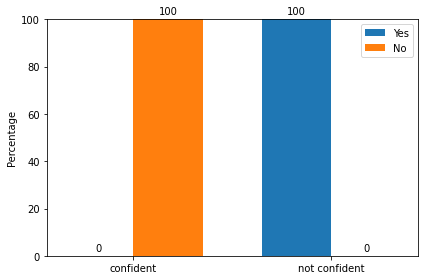

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich möchte mehr über das Thema erfahren, weiß aber nicht, wie oder wo ich mich informieren kann.)


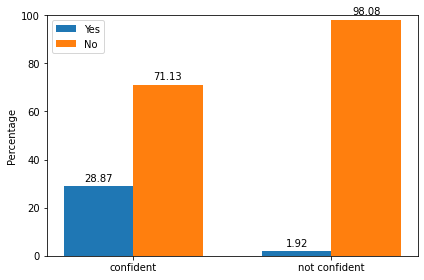

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Die vorhandenen Informationen sind nicht sehr übersichtlich und es ist oft schwer, eine Antwort auf meine Frage zu finden.)


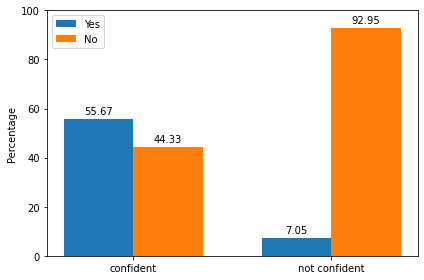

In [226]:
for label in df_filtered.keys()[6:11]:
    print(label)
    plotDataConfidence(label, label, x_scale_labels_condfidence)


Wählen Sie die Aussagen, die Sie für richtig halten. (Wenn zu viele Gegenstände in der falschen Mülltonne landen, kann es sein, dass der Müll nicht abgeholt wird.)


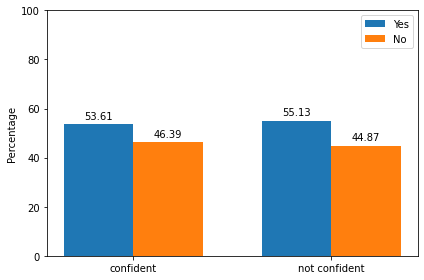

Wählen Sie die Aussagen, die Sie für richtig halten. (Ca. 30% des Mülls besteht auf Fehlwürfen (Müll wird in der falschen Tonne entsorgt).)


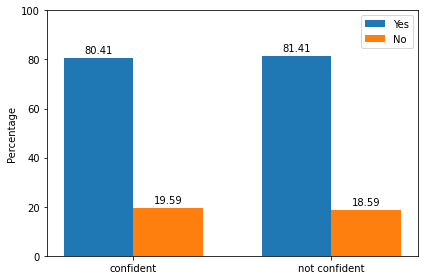

Wählen Sie die Aussagen, die Sie für richtig halten. (Menschen sortieren den Müll besser und präziser als Maschinen.)


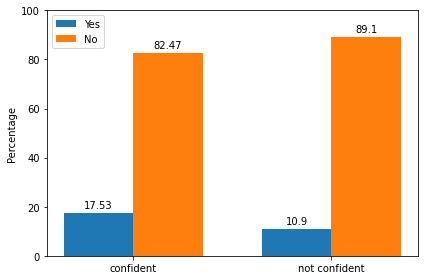

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird eine Tonne CO2 gespart.)


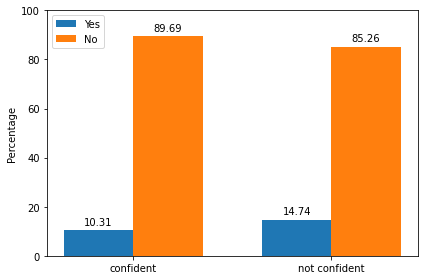

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird 100 Kilogramm CO2 gespart.)


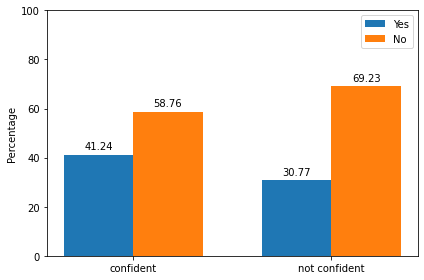

Wählen Sie die Aussagen, die Sie für richtig halten. (Der grüne Punkt hat keine Bedeutung mehr für die Mülltrennung.)


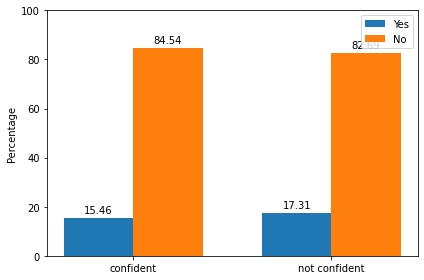

Wählen Sie die Aussagen, die Sie für richtig halten. (Blaues und rotes Glas gehört in den Braunglascontainer.)


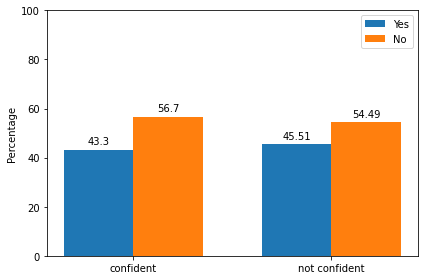

Wählen Sie die Aussagen, die Sie für richtig halten. (Kunststoff-Verpackungen sollte man ineinanderstapeln, um Platz zu sparen.)


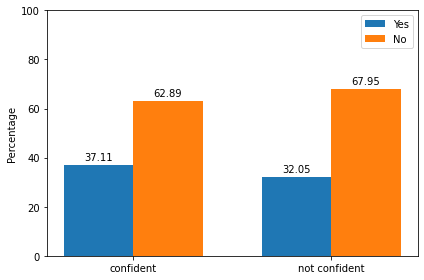

In [227]:
for label in df_filtered.keys()[12:20]:
    print(label)
    plotDataConfidence(label, label, x_scale_labels_condfidence)


Ich halte Mülltrennung für ein wichtiges Thema. (Eigene Kriterien) 


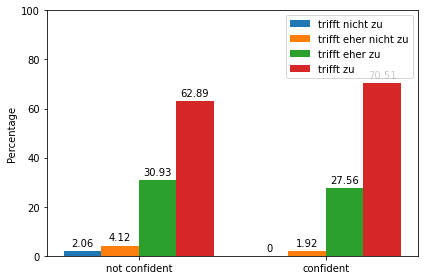

Ich fühle mich schlecht, wenn ich etwas in den Müll werfe ohne mir komplett sicher zu sein, dass es dort richtig ist. (Eigene Kriterien) 


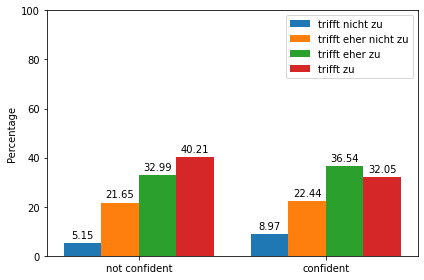

Ich fühle mich gut, wenn ich Müll trenne, da ich etwas zu Umwelt und Nachhaltigkeit beitrage. (Eigene Kriterien) 


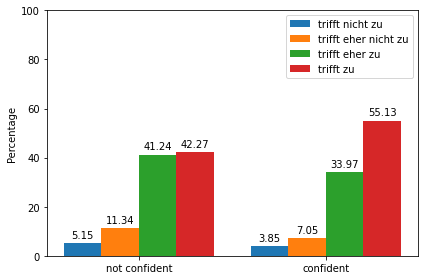

Ich fühle mich ausreichend informiert darüber, was in welcher Tonne entsorgt wird (Eigene Kriterien) 


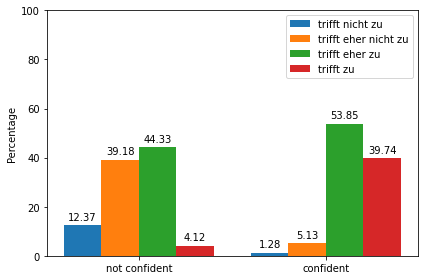

Ich bin oft unsicher, in welchen Müll bestimmte Gegenstände gehören. (Eigene Kriterien) 


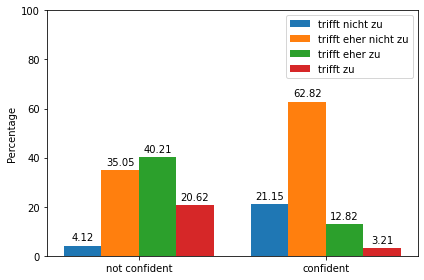

Ich habe genug Ressourcen, um mich über Mülltrennung/Recycling zu informieren, falls etwas unklar ist (Eigene Kriterien) 


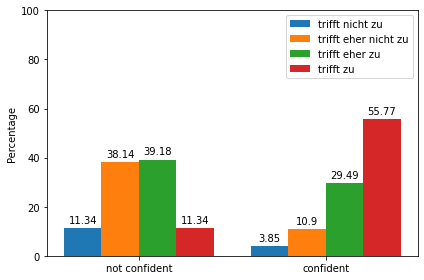

In [222]:
for label in df_filtered.keys()[21:27]:
    print(label)
    plot_likert_scale_confidence(label)


Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Entsorge ich es einfach im Restmüll)


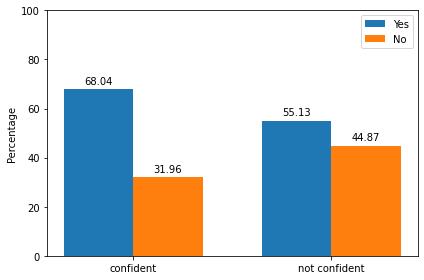

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Frage ich jemanden in meinem Umfeld)


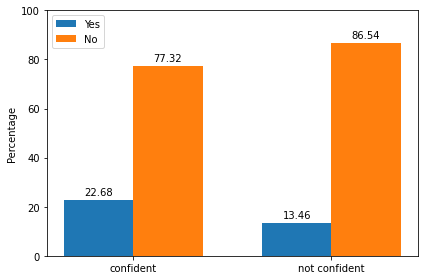

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Recherchiere ich online)


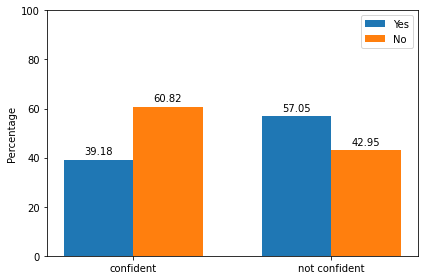

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Sonstiges)


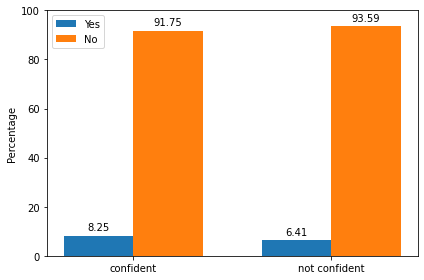

In [223]:
for label in df_filtered.keys()[27:31]:
    print(label)
    plotDataConfidence(label, label, x_scale_labels_condfidence)


<h4> Differences in living situation </h4>

In [228]:
# living situation difference
df_alone = df_filtered.loc[df_filtered['Wohnen Sie alleine oder mit anderen Personen zusammen?'] == 'allein']
df_not_alone = df_filtered.loc[(df_filtered['Wohnen Sie alleine oder mit anderen Personen zusammen?'] == 'in einer WG') | (df_filtered['Wohnen Sie alleine oder mit anderen Personen zusammen?'] == 'mit (Ehe)Partner*in') | (df_filtered['Wohnen Sie alleine oder mit anderen Personen zusammen?'] == 'bei den Eltern/Großeltern')]
df_with_kids = df_filtered.loc[df_filtered['Wohnen Sie alleine oder mit anderen Personen zusammen?'] == 'mit (Ehe)Partner*in und Kind/Kinder']


In [230]:
def plotDataLiving(label, save_file_name, x_scale_labels):
    data_alone = group_data(df_alone[label])
    data_not_alone = group_data(df_not_alone[label])
    data_with_kids = group_data(df_with_kids[label])
    
    if(0 not in data_alone.keys()):
        data_alone[0] = 0
    if(0 not in data_not_alone.keys()):
        data_not_alone[0] = 0
    if(0 not in data_with_kids.keys()):
        data_with_kids[0] = 0
    if(1 not in data_alone.keys()):
        data_alone[1] = 0
    if(1 not in data_not_alone.keys()):
        data_not_alone[1] = 0
    if(1 not in data_with_kids.keys()):
        data_with_kids[1] = 0
        
    no_values = [data_alone[0], data_not_alone[0], data_with_kids[0]]
    yes_values = [data_alone[1], data_not_alone[1], data_with_kids[1]]

    plot_yesno_compare_data('', x_scale_labels, yes_values, no_values, save_file_name)

In [231]:
def plot_likert_scale_living(title, label, x_scale_labels):
    data_alone = group_data(df_alone[label])
    data_not_alone = group_data(df_not_alone[label])
    data_with_kids = group_data(df_with_kids[label])

    strongly_disagree = 'trifft nicht zu'
    disagree = 'trifft eher nicht zu'
    agree = 'trifft eher zu'
    strongly_agree = 'trifft zu'
    
    if(strongly_disagree not in data_alone.keys()):
        data_alone[strongly_disagree] = 0
    if(strongly_disagree not in data_not_alone.keys()):
        data_not_alone[strongly_disagree] = 0
    if(strongly_disagree not in data_with_kids.keys()):
        data_with_kids[strongly_disagree] = 0
    if(disagree not in data_alone.keys()):
        data_alone[disagree] = 0
    if(disagree not in data_not_alone.keys()):
        data_not_alone[disagree] = 0
    if(disagree not in data_with_kids.keys()):
        data_with_kids[disagree] = 0
    if(agree not in data_alone.keys()):
        data_alone[agree] = 0
    if(agree not in data_not_alone.keys()):
        data_not_alone[agree] = 0
    if(agree not in data_with_kids.keys()):
        data_with_kids[agree] = 0
    if(strongly_agree not in data_alone.keys()):
        data_alone[strongly_agree] = 0
    if(strongly_agree not in data_not_alone.keys()):
        data_not_alone[strongly_agree] = 0
    if(strongly_agree not in data_with_kids.keys()):
        data_with_kids[strongly_agree] = 0
    
    strongly_disagree_values = [data_alone[strongly_disagree], data_not_alone[strongly_disagree], data_with_kids[strongly_disagree]]
    disagree_values = [data_alone[disagree], data_not_alone[disagree], data_with_kids[disagree]]
    agree_values = [data_alone[agree], data_not_alone[agree], data_with_kids[agree]]
    strongly_agree_values = [data_alone[strongly_agree], data_not_alone[strongly_agree], data_with_kids[strongly_agree]]

    plot_likert_compare_data('', x_scale_labels, strongly_disagree_values, disagree_values, agree_values, strongly_agree_values, label)
    

In [232]:
x_scale_labels_living = ['alone', 'with partner/friends', 'with kids']

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich habe nicht viel Zeit im Alltag, um mich mit Mülltrennung und Recycling auseinander zu setzen.)


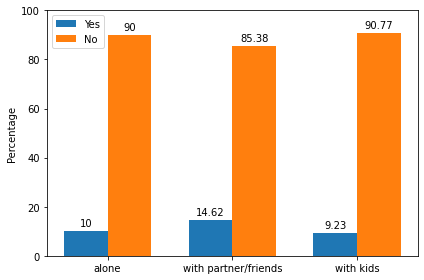

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Mir fehlt die Motivation, mich intensiver mit dem Thema auseinander zu setzen.)


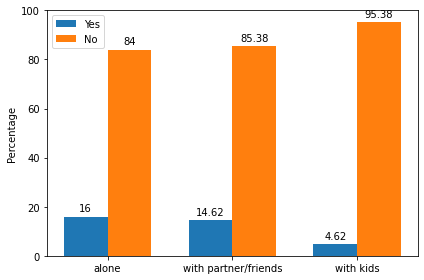

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich bin der Meinung, dass ich mich mit dem Thema gut genug auskenne und keine Unterstützung bei der Mülltrennung brauche.)


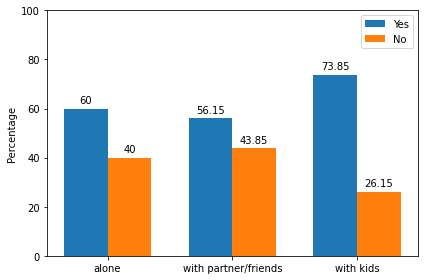

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Ich möchte mehr über das Thema erfahren, weiß aber nicht, wie oder wo ich mich informieren kann.)


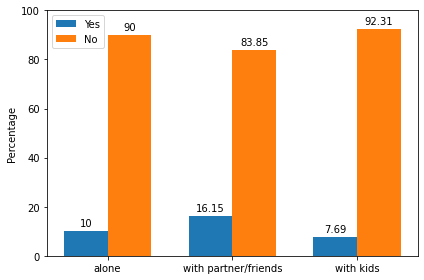

Wählen Sie die Aussagen zu Recycling und Mülltrennung aus, die auf Sie zutreffen. (Die vorhandenen Informationen sind nicht sehr übersichtlich und es ist oft schwer, eine Antwort auf meine Frage zu finden.)


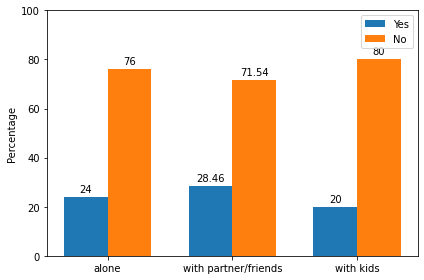

In [233]:
for label in df_filtered.keys()[6:11]:
    print(label)
    plotDataLiving(label, label, x_scale_labels_living)

Wählen Sie die Aussagen, die Sie für richtig halten. (Wenn zu viele Gegenstände in der falschen Mülltonne landen, kann es sein, dass der Müll nicht abgeholt wird.)


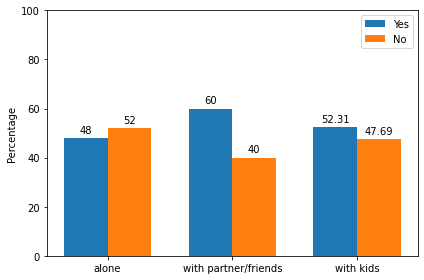

Wählen Sie die Aussagen, die Sie für richtig halten. (Ca. 30% des Mülls besteht auf Fehlwürfen (Müll wird in der falschen Tonne entsorgt).)


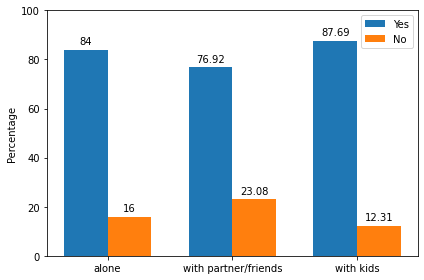

Wählen Sie die Aussagen, die Sie für richtig halten. (Menschen sortieren den Müll besser und präziser als Maschinen.)


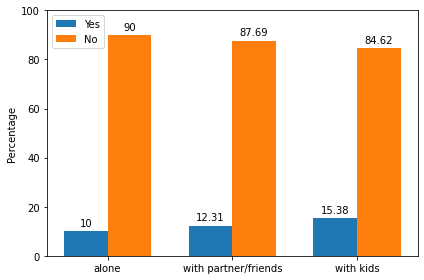

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird eine Tonne CO2 gespart.)


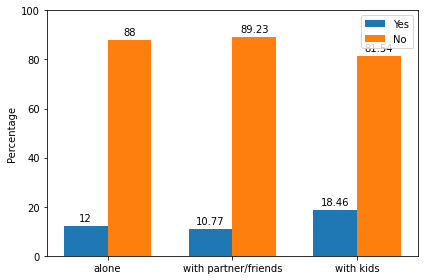

Wählen Sie die Aussagen, die Sie für richtig halten. (Pro Tonne Recyclingplastik wird 100 Kilogramm CO2 gespart.)


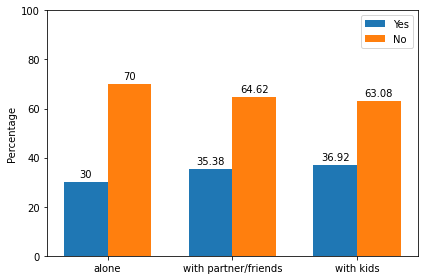

Wählen Sie die Aussagen, die Sie für richtig halten. (Der grüne Punkt hat keine Bedeutung mehr für die Mülltrennung.)


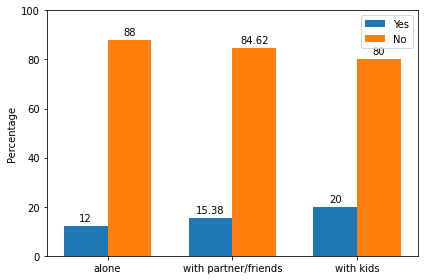

Wählen Sie die Aussagen, die Sie für richtig halten. (Blaues und rotes Glas gehört in den Braunglascontainer.)


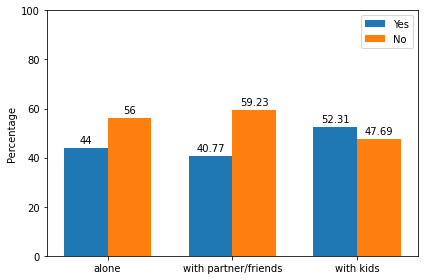

Wählen Sie die Aussagen, die Sie für richtig halten. (Kunststoff-Verpackungen sollte man ineinanderstapeln, um Platz zu sparen.)


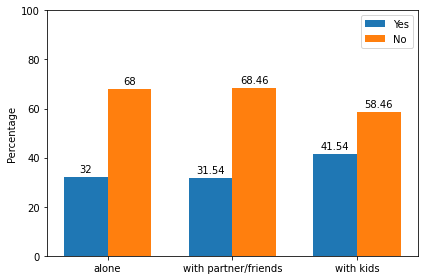

In [234]:
for label in df_filtered.keys()[12:20]:
    print(label)
    plotDataLiving(label, label, x_scale_labels_living)

Ich halte Mülltrennung für ein wichtiges Thema. (Eigene Kriterien) 


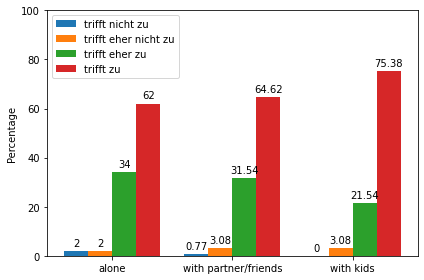

Ich fühle mich schlecht, wenn ich etwas in den Müll werfe ohne mir komplett sicher zu sein, dass es dort richtig ist. (Eigene Kriterien) 


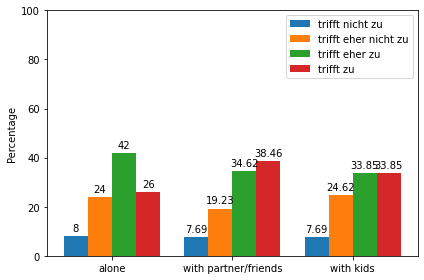

Ich fühle mich gut, wenn ich Müll trenne, da ich etwas zu Umwelt und Nachhaltigkeit beitrage. (Eigene Kriterien) 


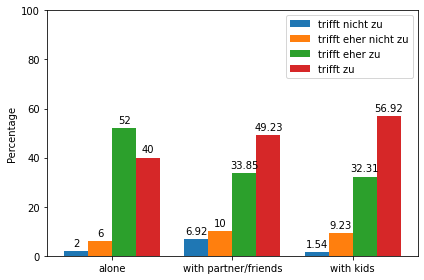

Ich fühle mich ausreichend informiert darüber, was in welcher Tonne entsorgt wird (Eigene Kriterien) 


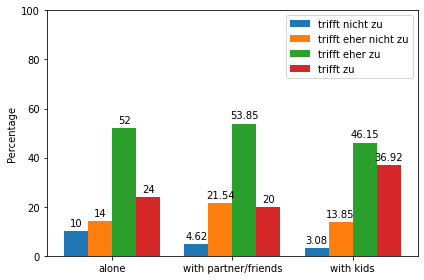

Ich bin oft unsicher, in welchen Müll bestimmte Gegenstände gehören. (Eigene Kriterien) 


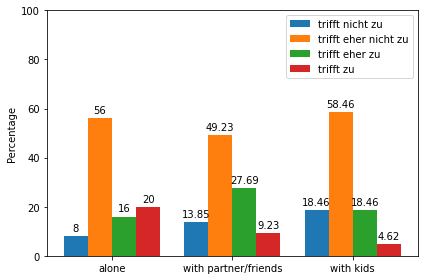

Ich habe genug Ressourcen, um mich über Mülltrennung/Recycling zu informieren, falls etwas unklar ist (Eigene Kriterien) 


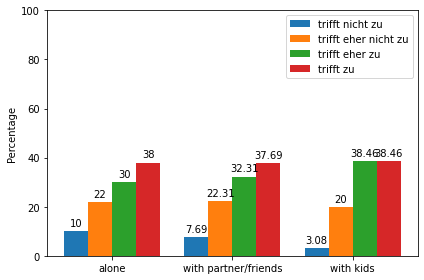

In [235]:
for label in df_filtered.keys()[21:27]:
    print(label)
    plot_likert_scale_living(label, label, x_scale_labels_living)

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Entsorge ich es einfach im Restmüll)


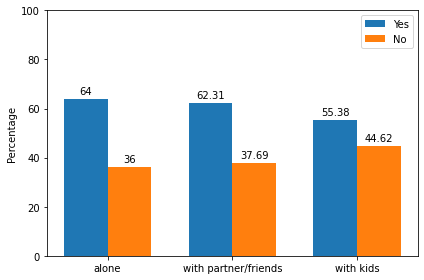

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Frage ich jemanden in meinem Umfeld)


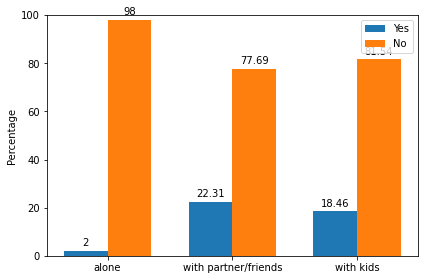

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Recherchiere ich online)


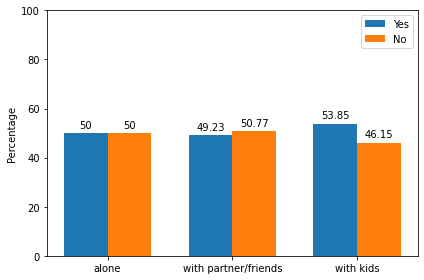

Wenn ich unsicher bin, in welchen Müll etwas gehört, dann... (Sonstiges)


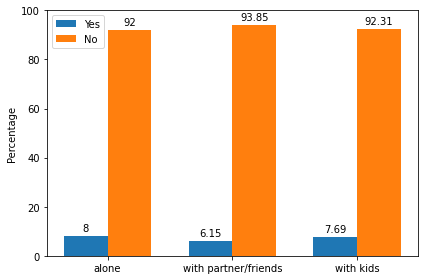

In [236]:
for label in df_filtered.keys()[27:31]:
    print(label)
    plotDataLiving(label, label, x_scale_labels_living)

<h2> Count Misthrows</h2>

<h4>Correct answers for comparison</h4>

In [72]:
correct = {
    34: "Biomüll", 
    35: "Gelbe Tonne|Wertstofftonne",
    36: "Papiertonne (blau)",
    37: "Papiertonne (blau)|Wertstofftonne|Gelbe Tonne",
    38: "Restmüll",
    39: "Gelbe Tonne|Wertstofftonne",
    40: "Restmüll",
    41: "Papiertonne (blau)",
    42: "Papiertonne (blau)",
    43: "Restmüll|Sonstiges (Sperrmüll, Recyclinghof, Annahmestellen etc.)",
    44: "Sonstiges (Sperrmüll, Recyclinghof, Annahmestellen etc.)",
    45: "Wertstofftonne|Restmüll",
    46: "Sonstiges (Sperrmüll, Recyclinghof, Annahmestellen etc.)",
    47: "Restmüll",
    48: "Papiertonne (blau)|Restmüll",
    49: "Restmüll",
    50: "Restmüll|Sonstiges (Sperrmüll, Recyclinghof, Annahmestellen etc.)",
    51: "Sonstiges (Sperrmüll, Recyclinghof, Annahmestellen etc.)",
    52: "Gelbe Tonne|Wertstofftonne",
    53: "Gelbe Tonne|Wertstofftonne",
    54: "Biomüll",
    55: "Biomüll",
    56: "Restmüll"
}

In [237]:
average_overview_new = {}

for x in range(1, len(correct) + 1):
    average_overview_new[x] = 0

<h4>Methods to compare given answers with correct answers and count misthrows</h4>

In [238]:
def compare_answers(given_answer, index):
    correct_answer = correct[index]
    if "|" in correct_answer:
        option_list = correct_answer.split("|")
        options = ' '.join(option_list)
        #print("correct options: {}".format(options))
        for option in option_list:
            if option == given_answer:
                return True
    else:
        #print("correct: {}".format(correct_answer))
        if correct_answer == given_answer:
            return True
        
    return False

In [239]:
def count_misthrows(data):
    misthrow_list = []
    average_divided = average_overview.copy()
    
    # go through all rows of data and check the answers
    for index, row in data.iterrows():
        misthrows = 0
        
        # check all the answers for the sorting and count the misthrows
        for columns_number in range(34, len(row) - 1):
            answered_correctly = compare_answers(row[columns_number], columns_number)
            if not answered_correctly:
                average_divided[columns_number] += 1
                misthrows += 1
        misthrow_list.append(misthrows)
    
    # count the amount of misthrows per question
    for key in average_divided:
        avg_percentage = (average_divided[key] / len(data)) * 100
        average_divided[key] = "{:0.2f}%".format(avg_percentage)
    #print(average_divided)

    # calculate the average number of misthrows
    sum = 0
    for number in misthrow_list:
        sum += number
    average = sum / len(misthrow_list)
    print("average is: {:0.2f}".format(average))
    average_percentage = (average / 57) * 100
    print("average percentage: {:0.2f}".format(average_percentage))
    return average_divided

In [240]:
def plot_misthrows(data):
    misthrow_list = []
    average_divided = average_overview_new
    
    # go through all rows of data and check the answers
    # for each participant
    for index, row in data.iterrows():
        misthrows = 0
        
        # check all the answers for the sorting and count the misthrows
        # for each item
        for columns_number in range(34, len(row) - 1):
            answered_correctly = compare_answers(row[columns_number], columns_number)
            if not answered_correctly:
                average_divided[columns_number - 33] += 1
                misthrows += 1
        misthrow_list.append(misthrows)
    
    print(average_divided)
    # count the amount of misthrows per question
    for key in average_divided:
        avg_percentage = (average_divided[key] / len(data)) * 100
        average_divided[key] = round(avg_percentage, 2)

    # plot misthrows
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    test = list(range(1, len(average_divided)+1))
    print(test)
    ax.set_xticks(test)
    
    rects1 = ax.bar(average_divided.keys(), average_divided.values())

    ax.bar_label(rects1, padding=3)
    ax.set_ylim(top=100)
    ax.set_ylabel('Percentage')

    plt.savefig('misthrows_general.jpg')
    plt.show()

<h4>Filter for people living in Berlin and check average misthrows</h4>

{1: 24, 2: 25, 3: 13, 4: 24, 5: 18, 6: 14, 7: 125, 8: 108, 9: 111, 10: 65, 11: 88, 12: 113, 13: 63, 14: 120, 15: 9, 16: 83, 17: 59, 18: 36, 19: 70, 20: 61, 21: 87, 22: 61, 23: 13}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


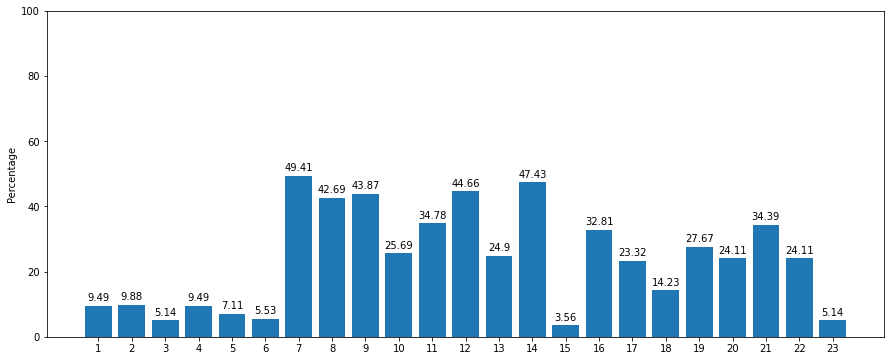

In [241]:
# show chart of wrong throws per item in percentage
plot_misthrows(df_filtered)

In [242]:
count_misthrows(df_filtered)

average is: 5.49
average percentage: 9.64


{34: '9.49%',
 35: '9.88%',
 36: '5.14%',
 37: '9.49%',
 38: '7.11%',
 39: '5.53%',
 40: '49.41%',
 41: '42.69%',
 42: '43.87%',
 43: '25.69%',
 44: '34.78%',
 45: '44.66%',
 46: '24.90%',
 47: '47.43%',
 48: '3.56%',
 49: '32.81%',
 50: '23.32%',
 51: '14.23%',
 52: '27.67%',
 53: '24.11%',
 54: '34.39%',
 55: '24.11%',
 56: '5.14%'}

In [19]:
#def count_misthrows(data):
#    misthrow_list = []
#    for index, row in data.iterrows():
        #print("\n\nindex: {}".format(index))
        #print(len(row) - 1)
#        misthrows = 0
#        for columns_number in range(34, len(row) - 1):
            #print('########')
            #print("answer: {}".format(row[columns_number]))
#            answered_correctly = compare_answers(row[columns_number], columns_number)
            #print("answer was {}".format(answered_correctly))
#            if not answered_correctly:
#                misthrows += 1
        #print("{} misthrows".format(misthrows))
#        misthrow_list.append(misthrows)
    #print(misthrow_list)
    
#    sum = 0
#    for number in misthrow_list:
#        sum += number
#    average = sum / len(misthrow_list)
#    print("average is: {}".format(average))
#    average_percentage = (average / 57) * 100
#    print("average percentage: {}".format(average_percentage))